## Todays exercise - the maximum amount of points you can get is 100: 
Based on the content of the lecture today you should be able to solve the following notebook and answer the questions.

Help will mainly be available in the hours allocated after lecture, BUT:

PLEASE try to use the relevant links posted and/or google before asking. You will learn more and work faster if you try to search out information for yourself. 



# Feed-forward Neural Network exercise
In this exercise you are going to learn how to create a feed-forward neural network using `Keras`.

In [1]:
# Import all the packages
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
#from keras.models import Sequential
#from keras.layers import Dense
#from keras import optimizers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt


/opt/tljh/user/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/tljh/user/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/tljh/user/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/tljh/user/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

## Neural Network on Breast cancer dataset
First we are going to try to train a neural network with one layer on the breast cancer dataset.
## Loading the data:
### Q1 (5 points): Load the data and split into training and validation. Scale the X data (both train and validation).
**Hint:** Use the `train_test_split(x_data, y_data)` function imported above to split the dataset. E.g. the x_data and y_data can be retrieved from the dataset by `cancer.data` and `cancer.target`.

**Hint:** To scale the data use https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html (Also loaded above). Give the vairables the same name (e.g. `x_train = scaling_function(x_train)`)

In [2]:
# Load dataset
cancer = load_breast_cancer()
# Split training and validation set
X_train, X_val, y_train, y_val = ?
# Scale the data
X_train = ?
X_val = ?

SyntaxError: invalid syntax (<ipython-input-2-7f27582a1031>, line 4)

### Q2 (5 points): Answer the following qustions:
- How many features does the x data have? 
- What kind of target variable do you have (binary, categorical, continuous)? And what is its shape?
- Why is the shape of the data important to know when building the neural network?


## Defining the architechture of the Neural Network
The architecture will be:
1. Hidden layer with 10 units. Activation function ReLU.
2. Output layer with 1 unit. Activation function Sigmoid.

**Step 1**: Define the hyperparameters that the network will use:

In [10]:
# Number of input features
n_features = 30
# Number of hidden units
n_hidden = 10
# Number of output units
n_out = 1
# Learning rate
lr = 0.001
# Activation function
act_h = 'relu'
# Output function
act_o = 'sigmoid'
# Loss function
loss_f = 'binary_crossentropy'
# Batch size 
batch_size = 64
# Number of epochs
n_epochs = 80

**Step 2**: Define the model configuration and compile it.

In [19]:
# Initialize the model
model = Sequential()
# Define hidden layer with relu activation function
model.add(Dense(n_hidden, activation=act_h, input_shape=(n_features,))) # Input shape defines the number of features
# Define output layer
model.add(Dense(n_out, activation=act_o))
# Compile the model
model.compile(
    optimizer=optimizers.Adam(lr=lr), # Define optimizer and learning rate
    loss=loss_f, # Define loss function
    metrics=['accuracy']) # Define performance measure
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None


We can look as well at the shape of the parameters:

In [20]:
# Print the parameters of the model, here 'kernel' refers to weight
for ww in model.weights:
    print("Parameter: ",ww.name, " shape: ", ww.shape)

Parameter:  dense_10/kernel:0  shape:  (30, 10)
Parameter:  dense_10/bias:0  shape:  (10,)
Parameter:  dense_11/kernel:0  shape:  (10, 1)
Parameter:  dense_11/bias:0  shape:  (1,)


**Step 3**: Define the batch size and number of epochs and train the model. Remember to set up the validation data as well.

In [21]:
# Train the model
history = model.fit(X_train, # Input
                    y_train, # Output
                    batch_size=batch_size, # Divide the data into batches
                    epochs=n_epochs, # Number of iterations 
                    validation_data=(X_val, y_val)) # Validation data

Train on 426 samples, validate on 143 samples
Epoch 1/80
426/426 [==============================] - 2s 6ms/sample - loss: 0.6196 - accuracy: 0.6103 - val_loss: 0.6216 - val_accuracy: 0.6224
Epoch 2/80
426/426 [==============================] - 1s 2ms/sample - loss: 0.5623 - accuracy: 0.6808 - val_loss: 0.5680 - val_accuracy: 0.6853
Epoch 3/80
426/426 [==============================] - 1s 3ms/sample - loss: 0.5153 - accuracy: 0.7488 - val_loss: 0.5219 - val_accuracy: 0.7203
Epoch 4/80
426/426 [==============================] - 1s 3ms/sample - loss: 0.4723 - accuracy: 0.7864 - val_loss: 0.4842 - val_accuracy: 0.7483
Epoch 5/80
426/426 [==============================] - 1s 2ms/sample - loss: 0.4373 - accuracy: 0.8286 - val_loss: 0.4520 - val_accuracy: 0.7902
Epoch 6/80
426/426 [==============================] - 1s 2ms/sample - loss: 0.4061 - accuracy: 0.8615 - val_loss: 0.4243 - val_accuracy: 0.8182
Epoch 7/80
426/426 [==============================] - 1s 3ms/sample - loss: 0.3790 - accur

**Step 4**: Plot training curves and report the best validation accuracy.

Best validation accuracy: 0.951049 at epoch:  56


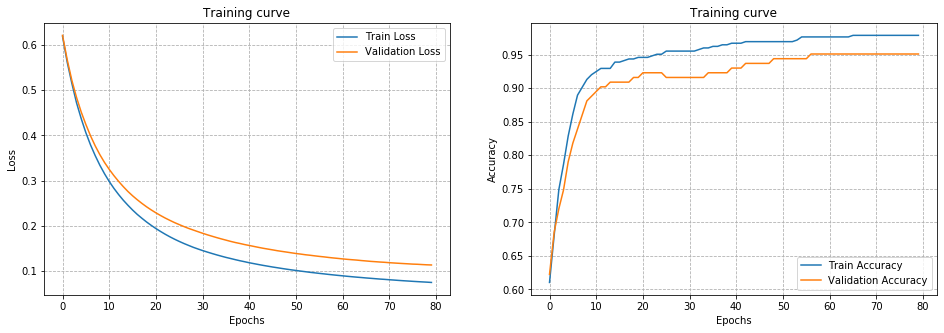

In [22]:
# Print the best validation accuracy
print('Best validation accuracy:',np.max(history.history['val_accuracy']), 'at epoch: ', np.argmax(history.history['val_accuracy']))

# Plot training curves
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1, 2, 1) 
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training curve')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epochs')
ax1.grid(linestyle='--')
ax1.legend()
ax2 = fig.add_subplot(1, 2, 2) 
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training curve')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epochs')
ax2.grid(linestyle='--')
ax2.legend()
plt.show()

## Neural Network on Protein Data
Now, we go back again to the secretory dataset. First, we load it as before:

In [24]:
%cd
%cd ml_data
!ln -s /exercises/ml_intro/ml_data/freq_train.txt ./freq_train.txt
!ln -s /exercises/ml_intro/ml_data/freq_val.txt ./freq_val.txt 
!ln -s /exercises/ml_intro/ml_data/label_train.txt ./label_train.txt
!ln -s /exercises/ml_intro/ml_data/label_val.txt ./label_val.txt 
!pwd
!ls

/home/jupyter-freddie2
/home/jupyter-freddie2/ml_data
ln: failed to create symbolic link './freq_train.txt': File exists
ln: failed to create symbolic link './freq_val.txt': File exists
ln: failed to create symbolic link './label_train.txt': File exists
ln: failed to create symbolic link './label_val.txt': File exists
/home/jupyter-freddie2/ml_data
freq_train.txt	freq_val.txt  label_train.txt  label_val.txt


##### Below are the names of the files use these strings to load the data (you have loaded such files before with numpy)

`'freq_train.txt'`

`'freq_val.txt'`

`'label_train.txt'`

`'label_val.txt'`

In [27]:
X_train = ?
y_train =?
X_test = ?
y_test = ?

## Build your own model
### Q3 (20 points): Create a Feed-forward neural network as you have done before (do not scale the data here). 

The architecture should be:
1. Hidden layer with 64 units. Activation function ReLU.
2. Output layer with 1 unit. Activation function Sigmoid.

Leave the rest of the hyperparameters the same as with the previous dataset.
**Hint:** Think about the number of features in you dataset 

### Q4 (4 points): How many parameters does this network have?

#### Q5 (5 points): Which dimensions (shape) does the weights (or kernel) and bias of the hidden (dense) layer have?

### Q6 (5 points): Answer the following questions:
- what is the difference between a parameter and a hyperparameter?
- Are the weigths a parameter or a hyperparameter?
- Is the weigths a parameter or a hyperparameter?

### Q7 (10 points): Train, then plot the training curve and report the best validation accuracy.

### Q8 (10 points): Define the following terms and answer the questions:
- Epoch:
- Batch:
- Learning rate:
- Activation function:
- Is the number of nodes a hyperparameter?:
- Is the bias a hyperparameter?: 

## Trying different models
### Q9 (15 points):Try the following models and report for each of them the:
- **Number of parameters**
- **Training curves**
- **Best validation accuracy**

#### **Model 1**. Two hidden layers. 

**Architecture**:
1. Hidden layer with 128 units. Activation function ReLU.
2. Hidden layer with 64 units. Activation function ReLU. (Remove the input_shape argument in this layer)
3. Output layer with 1 unit. Activation function Sigmoid.

#### **Model 2**. Small network. 

**Architecture**:
1. Hidden layer with 5 units. Activation function ReLU.
2. Output layer with 1 unit. Activation function Sigmoid.

**Model 3**: Large learning rate. 

**Architecture**:
1. Hidden layer with 64 units. Activation function ReLU.
2. Output layer with 1 unit. Activation function Sigmoid.

**Learning rate**: 0.1

**Model 4**: Small learning rate. 

**Architecture**:
1. Hidden layer with 64 units. Activation function ReLU.
2. Output layer with 1 unit. Activation function Sigmoid.

**Learning rate**: 0.00001

### Q10 (7 points): Which model is overfitting the most? What do you think might be the cause?

### Q11 (7 points): What main differences can you observe between using a large and a small learning rate?

### Q12 (7 points): Which model do you think is the best? Why?